# CAR PRICE PREDICTION WITH MACHINE LEARNING

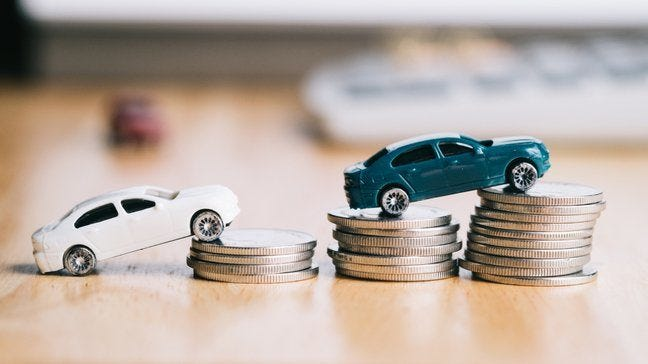

## **ABOUT THE AUTHOR**

Hi there! I'm Akshay Shekade, a data scientist in training. I'm diving into the world of data science and exploring various concepts and techniques to enhance my skills. Join me on this exciting journey as we learn and grow in the field of data science together. 

> "Community is the heart of growth and learning. Together, we can achieve more than we ever could alone."

| Name               | Email                                               | LinkedIn                                                  | GitHub                                           | Kaggle                                      |
|--------------------|-----------------------------------------------------|-----------------------------------------------------------|--------------------------------------------------|-----------------------------------------------|
| **Akshay Shekade**      |akshayshekade757@gmail.com  | [![LinkedIn Badge](https://img.shields.io/badge/LinkedIn-%23000000.svg?style=for-the-badge&logo=LinkedIn&logoColor=white)](https://www.linkedin.com/in/akshay-shekade-a225a8135/)  | [![GitHub Badge](https://img.shields.io/badge/GitHub-%23000000.svg?style=for-the-badge&logo=GitHub&logoColor=white)](https://github.com/AkshayShekade)  | [![Kaggle Badge](https://img.shields.io/badge/Kaggle-%23000000.svg?style=for-the-badge&logo=Kaggle&logoColor=white)](https://www.kaggle.com/akshayshekade)  |

> **LETS BEGIN** :)

### OBJECTIVE :

- The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more.
- Car price prediction is one of the major research areas in machine learning.
- So if you want to learn how to train a car price prediction model then this project is for you.

**IMPORTING ALL THE NECESSARY LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


**BRIEF OVERVIEW OF EACH COLUMN**

- **Car_Name:** The name or model of the car.
- **Year:** The year the car was manufactured.
- **Selling_Price:** The selling price of the car.
- **Present_Price:** The present price or current market value of the car.
- **Driven_kms:** The distance driven by the car (in kilometers).
- **Fuel_Type:** The type of fuel the car uses (e.g., petrol, diesel, CNG).
- **Selling_type:** The type of selling (e.g., dealer, individual).
- **Transmission:** The transmission type of the car (e.g., manual, automatic).
- **Owner:** The number of previous owners of the car.

**SORTING THE VALUES ACCORDING TO YEAR**

In [3]:
df.sort_values(by='Year',inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
1,sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0
2,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
3,innova,2005,2.75,10.21,90000,Petrol,Individual,Manual,0
4,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0


**INFORMATION ABOUT A DATASET**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**DESCRIPTION OF A DATASET**

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [5]:
df.describe(include='object').T

,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Selling_type,301,2,Dealer,195
Transmission,301,2,Manual,261


**CHECKING MISSING VALUES**

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

**CHECKING DUPLICATE VALUES**

In [7]:
df.duplicated().sum()

2

**DROPPING DUPLICATE VALUES**

In [8]:
df.drop_duplicates(inplace=True)

**SEPARATING CATEGORICAL AND NUMERICAL COLUMNS**

In [23]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Columns is : {cat_cols}")

print("====" * 30)

num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
print(f"Numerical Columns is : {num_cols}")

Categorical Columns is : ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
Numerical Columns is : ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']


### DATA VISUALIZATION AND EDA

> **CHECK FOR OUTLIERS**

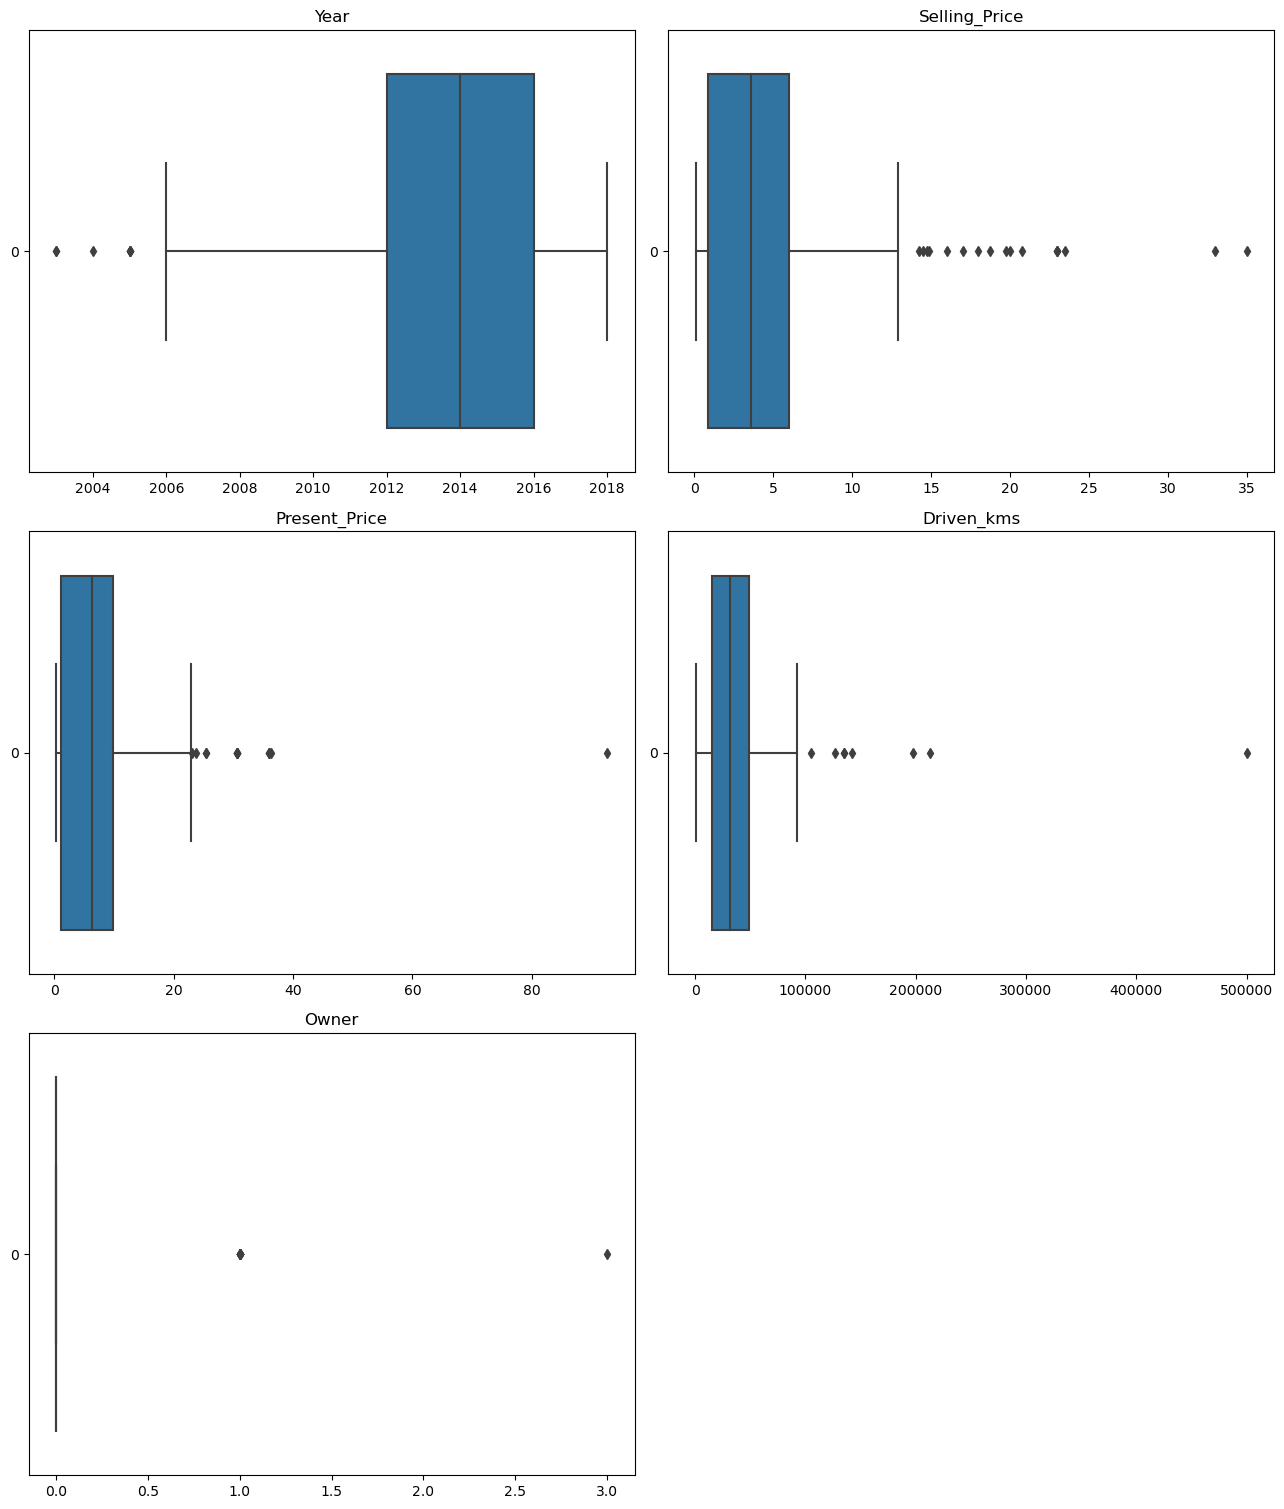

In [21]:
plt.figure(figsize=(13, 30))

x = 1
for col in df.describe().columns:
    plt.subplot(6, 2, x)
    sns.boxplot(df[col], orient = 'horizontal')
    plt.title(col)
    x += 1

plt.tight_layout()
plt.show()

> **CORRELATION HEATMAP**

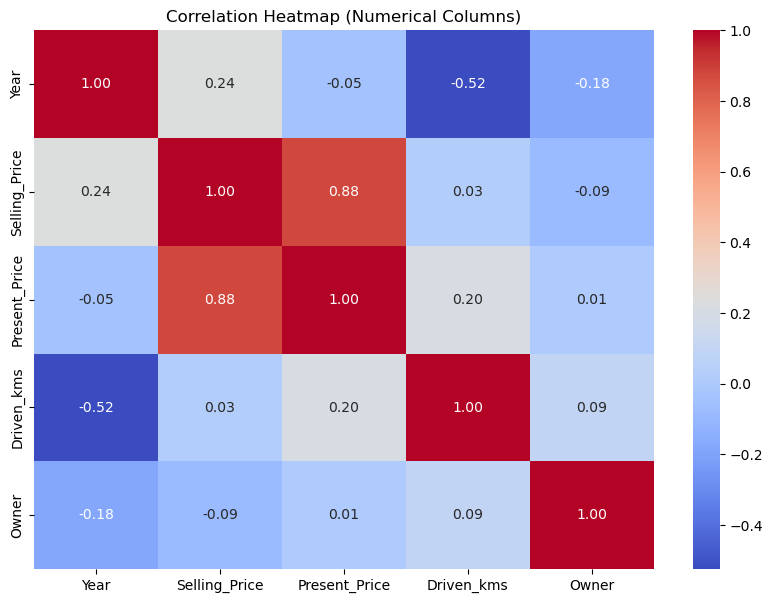

In [28]:
num_df = df[num_cols]

# Calculate the correlation matrix for numerical columns
correlation_matrix = num_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

**Observation :**

- **Strong Positive Correlation:** Selling Price and Present Price have a very strong positive correlation indicating a nearly perfect linear relationship. This makes sense as present market value likely influences selling price.

- **Year's Influence:** Year seems weakly negatively correlated with Selling Price, Present Price, and Driven_Kms. Newer cars (lower Year values) tend to have higher selling prices, lower present prices, and lower driven kilometers.

- **Mileage Matters:** Driven_Kms shows a weak negative correlation with Selling Price and Present Price. Cars with lower mileage (lower Driven_Kms values) tend to sell for more.

> **DISTRIBUTION OF NUMERIC FEATURE**

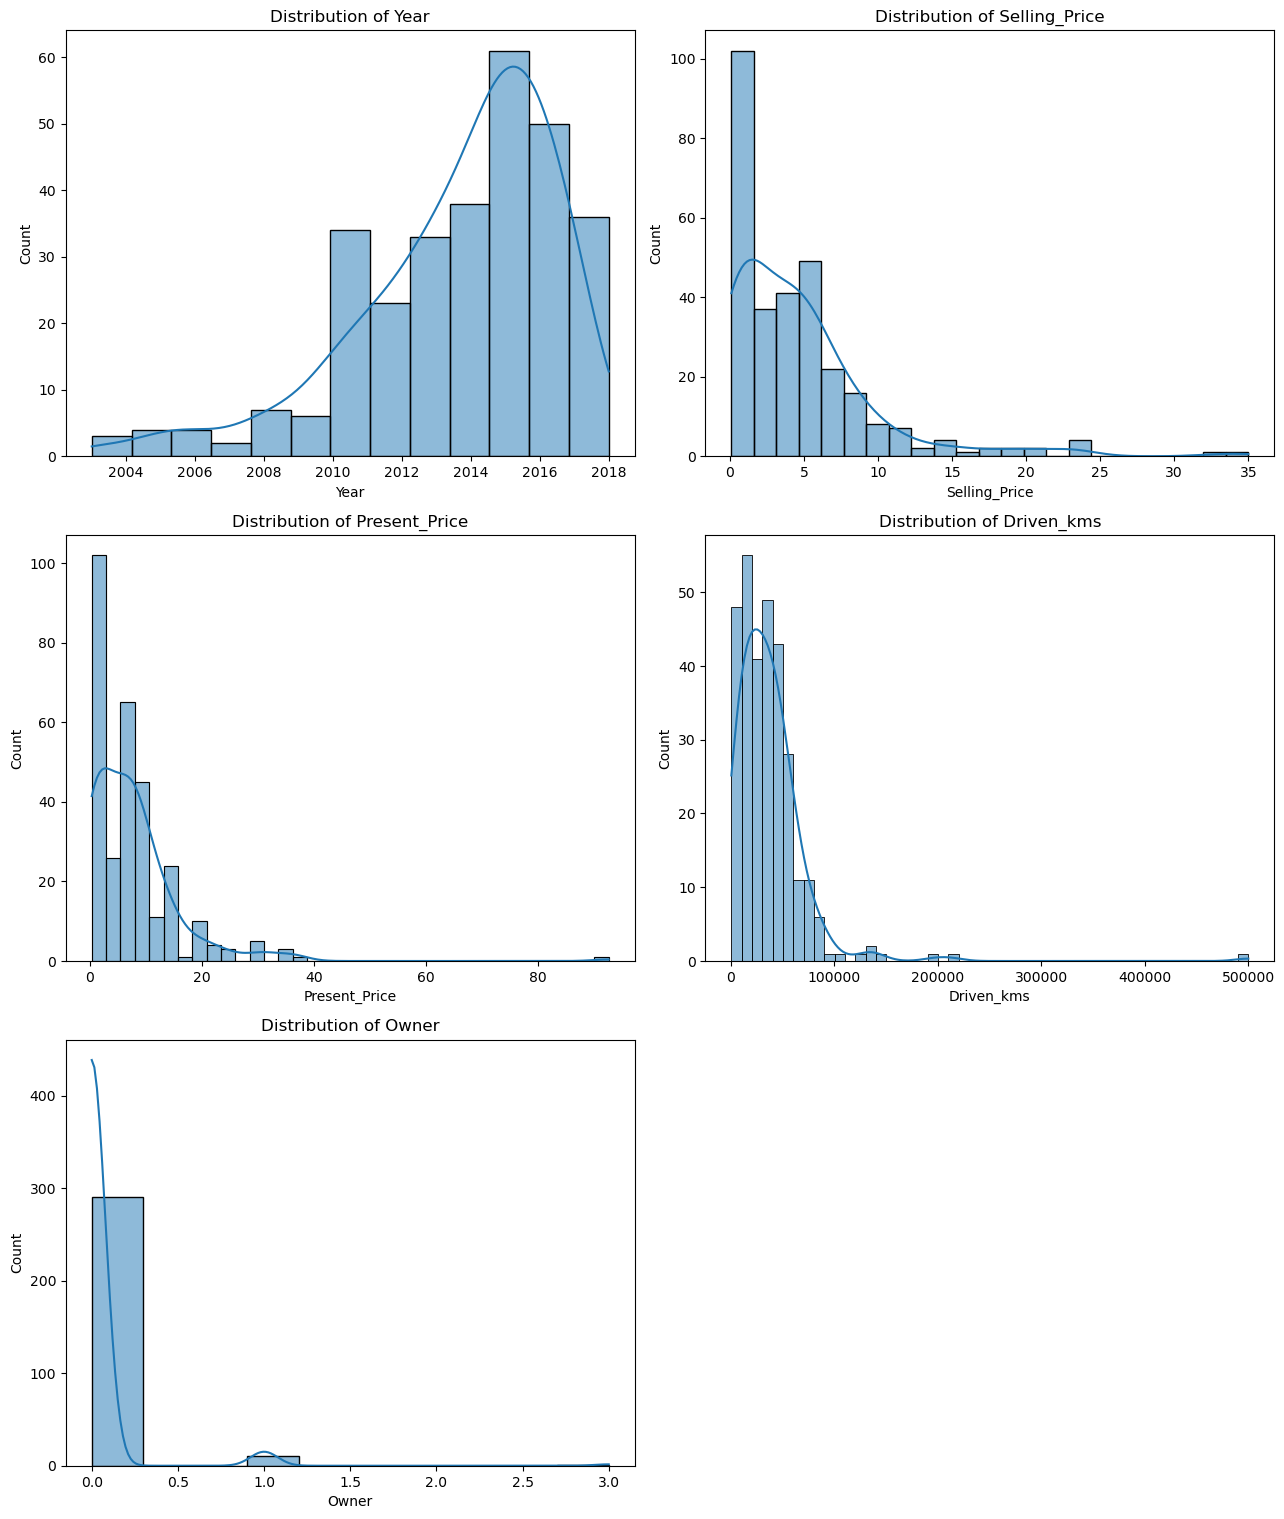

In [34]:
plt.figure(figsize=(13, 30))

x = 1
for col in df.describe().columns:
    plt.subplot(6, 2, x)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    x += 1

plt.tight_layout()
plt.show()

> **SCATTER PLOTS**

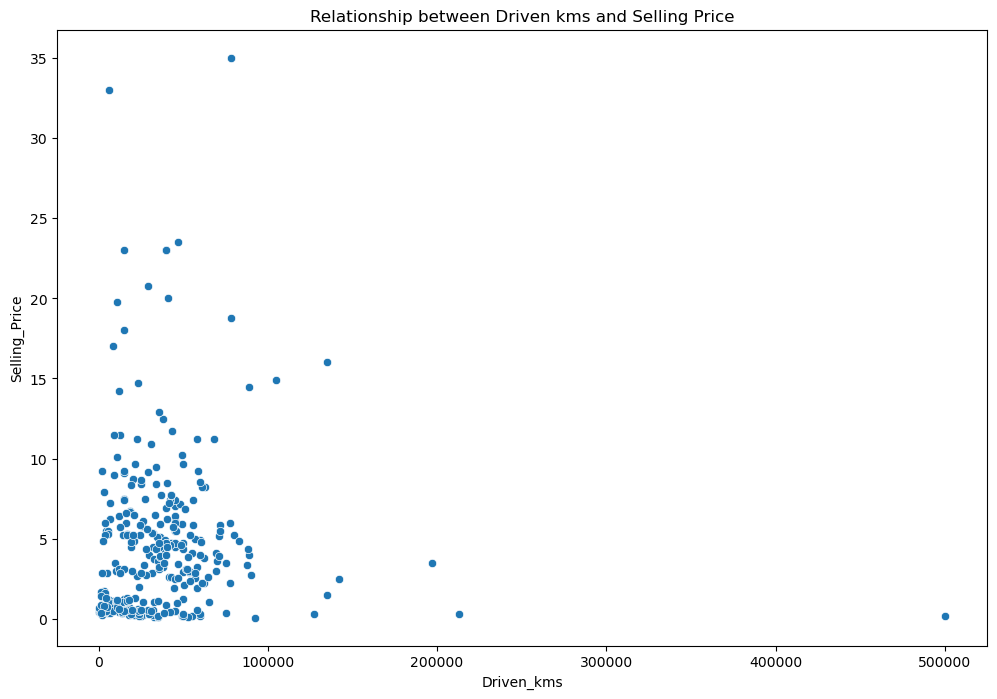

In [35]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title('Relationship between Driven kms and Selling Price')
plt.show()

- The plot suggests a negative correlation between Driven Kms and Selling Price.
- Cars with higher driven kilometers tend to sell for less.

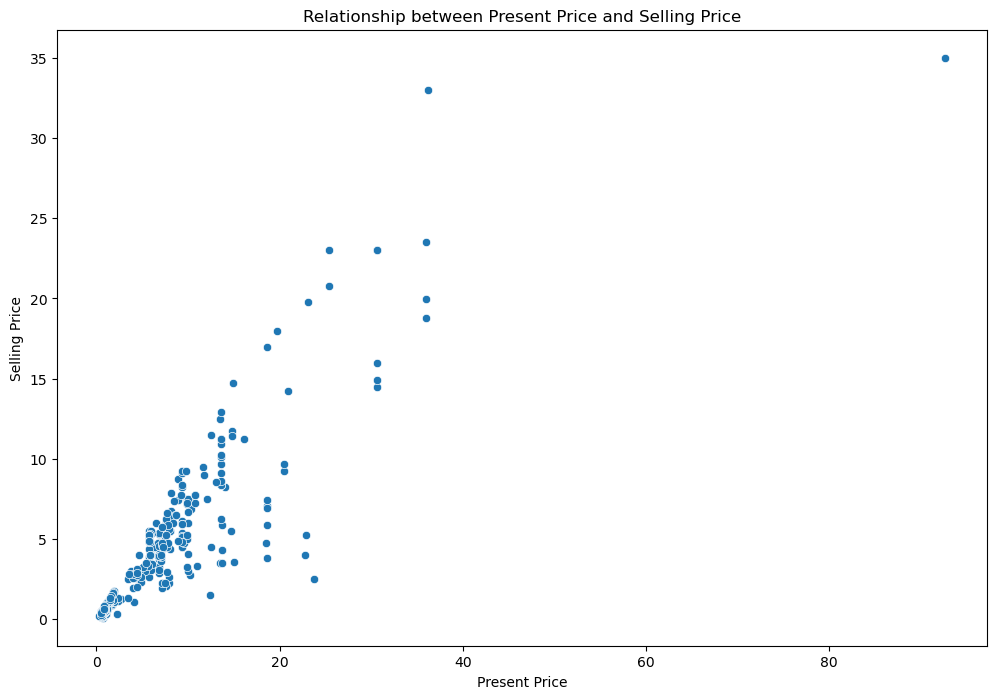

In [36]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Relationship between Present Price and Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')

plt.show()

**Observation :**
- Price Match: The plot reveals a strong positive correlation between Present Price and Selling Price. Cars with a higher present market value tend to sell for more.

- Market Influence: This suggests the present market value heavily influences the final selling price.

> **COUNT PLOTS OF CATEGORICAL FEATURE**

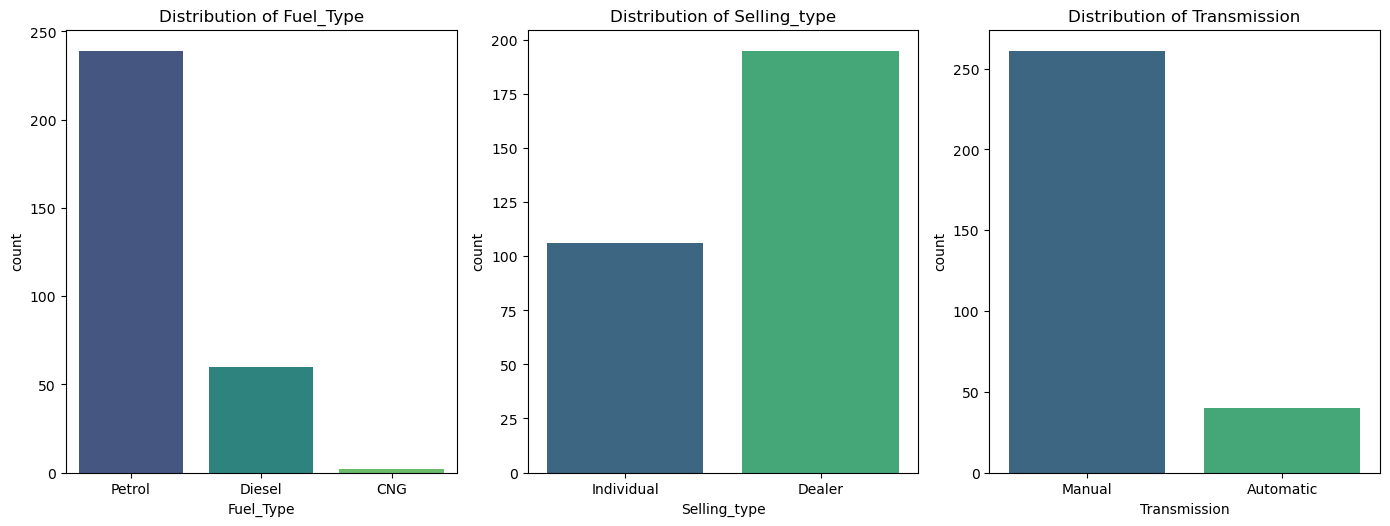

In [43]:
plt.figure(figsize=(14, 30))
categorical_col = ['Fuel_Type', 'Selling_type', 'Transmission']
x = 1
for col in categorical_col:
    plt.subplot(6, 3, x)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    x += 1

plt.tight_layout()
plt.show()

> **TOP CAR MODELS WITH HIGHEST FREQUENCY**

Enter the number of top car models to display: 10


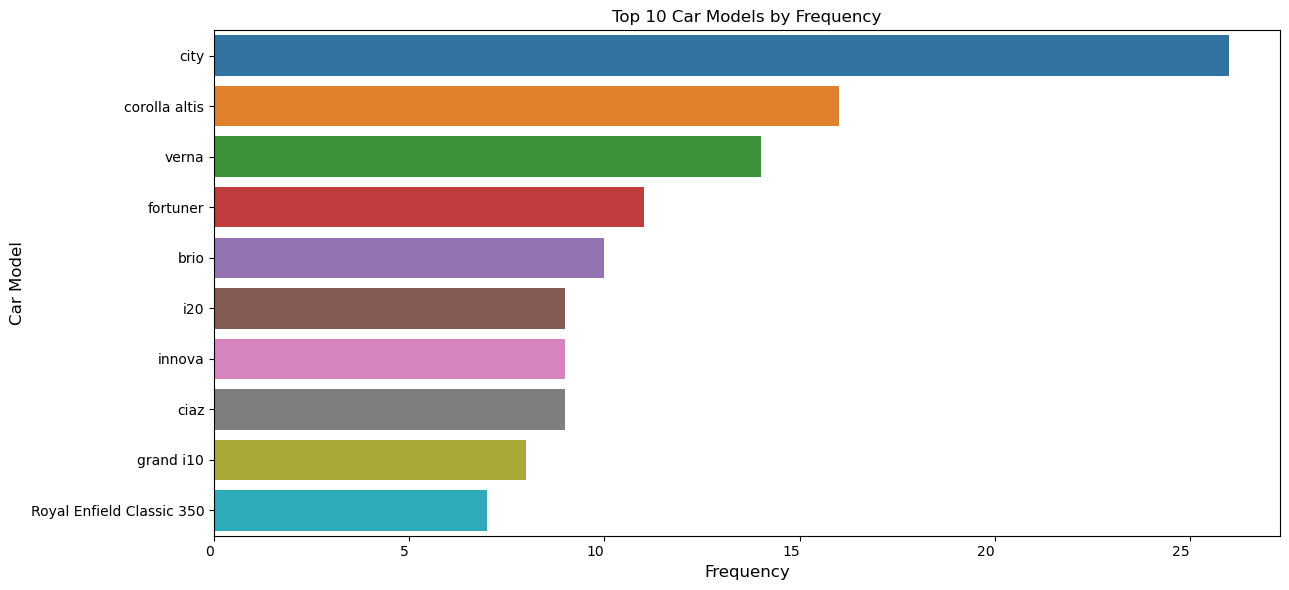

In [89]:
num_top_models = int(input("Enter the number of top car models to display: "))

top_car_models = df['Car_Name'].value_counts().nlargest(num_top_models)

plt.figure(figsize=(13, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {num_top_models} Car Models by Frequency')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Car Model', fontsize=12)
plt.tight_layout()
plt.show()

> **TOP CAR MODELS WITH HIGHEST AVERAGE PRICE**

Enter the number of top cars to calculate the average price: 10


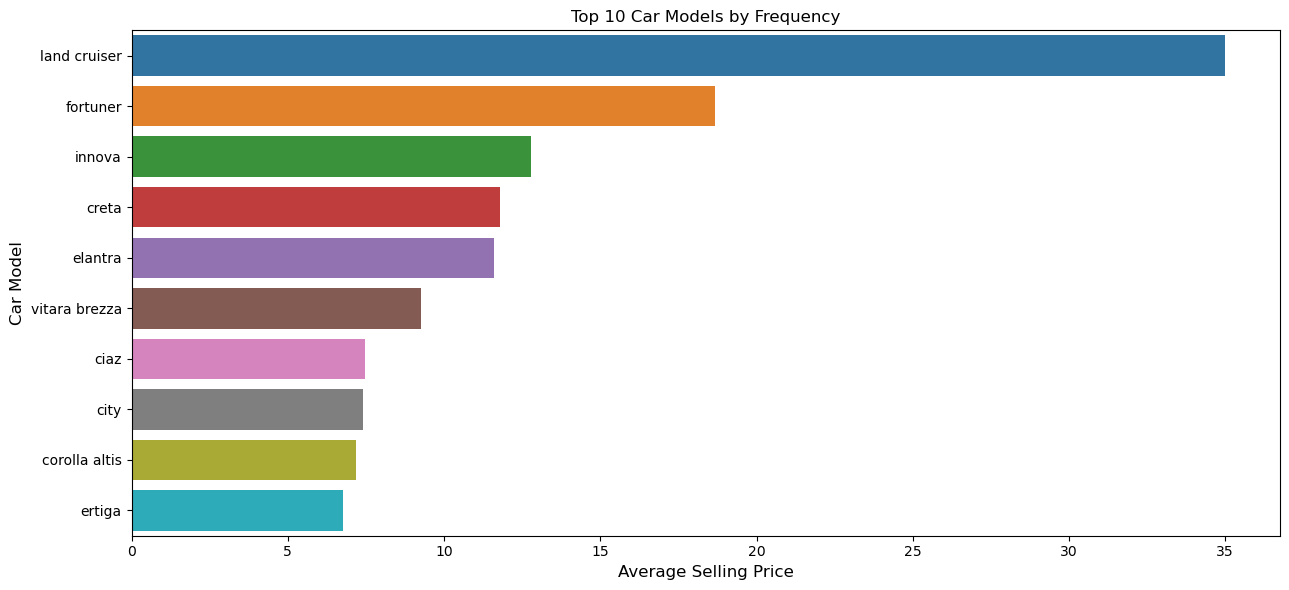

In [90]:
num_top_cars = int(input("Enter the number of top cars to calculate the average price: "))

top_car_models_avg = df.groupby('Car_Name')['Selling_Price'].mean().nlargest(num_top_cars)

plt.figure(figsize=(13, 6))
sns.barplot(x=top_car_models_avg.values, y=top_car_models_avg.index)
plt.title(f'Top {num_top_models} Car Models by Frequency')
plt.xlabel('Average Selling Price', fontsize=12)
plt.ylabel('Car Model', fontsize=12)
plt.tight_layout()
plt.show()

### DATA CLEANING AND TRANSFORMING

> **CHECK FEATURES**

In [93]:
columns = ['Fuel_Type', 'Selling_type', 'Transmission']
for column in columns:
    print(df[column].value_counts())
    print("====" * 10)

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


> **ENCODE CATEGORICAL FEATURE**

In [94]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

### PREDICTION

> **DEFINE TARGET VARIABLE**

In [95]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

> **TRAIN AND TEST DATA**

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

> **INITIALIZE THE LINEAR REGRESSION MODEL**

In [97]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

> **EVALUATION OF MODEL**

In [98]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 4.937046546470713
R-squared: 0.8048410571873459


> **PREDICTIONS**

In [99]:
new_car = [[2022, 20000, 0, 1, 1, 0, 0]]  # Example new car data
predicted_price = model.predict(new_car)
print('Predicted Selling Price:', predicted_price[0])

Predicted Selling Price: 8543.521199196653


- **Thank you so much for taking the time to explore this notebook with me. Your support means the world to me, and I couldn't have come this far without it. As I continue my journey in data science and machine learning, I humbly ask for your continued support and encouragement. Together, we can make a difference in the world of data science and beyond. 🚀💫**